<a href="https://colab.research.google.com/github/JoDeMiro/LuaLisa/blob/main/Lua_Lisa_04_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import time
import math   
import random

import sklearn
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from copy import deepcopy

from skimage.draw import ellipse

from IPython.display import clear_output


In [2]:
id = np.arange(0, 1, 0.1)
id = np.linspace(0, 1, 100)
beta = 3
y1 = np.sin(id) * beta
y2 = np.sin(id * beta)

print(id.shape)
print(y1.shape)

(100,)
(100,)


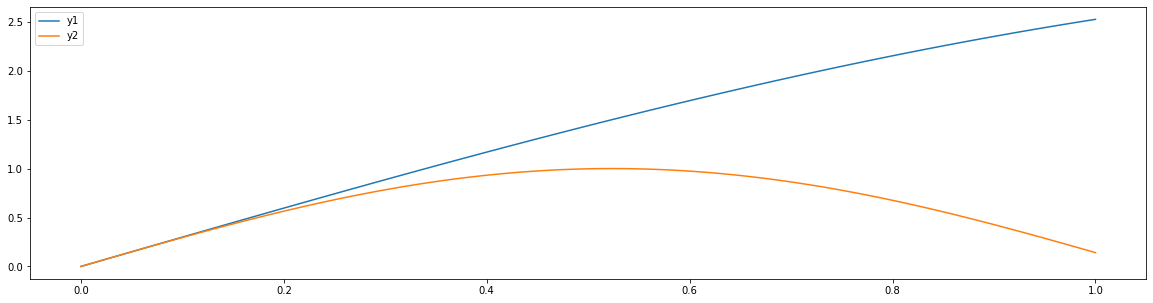

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(id, y1, label='y1')
plt.plot(id, y2, label='y2')
plt.legend()
plt.show()

(100, 1)
(100,)


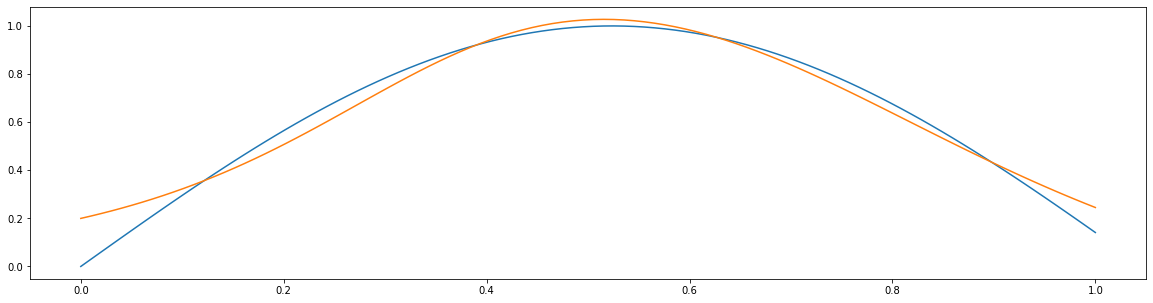

In [4]:
mlp = MLPRegressor(hidden_layer_sizes=(3,2),
                   activation='tanh',
                   solver='adam',
                   batch_size=100,
                   learning_rate_init=0.1,
                   max_iter=200,
                   shuffle=True,
                   random_state=1)

def sin(id = None, beta = None):
  sinus = id * beta
  return beta

input = id.reshape(-1,1)
target = y2
print(input.shape)
print(target.shape)

mlp.fit(input, target)

pred = mlp.predict(input)

plt.figure(figsize=(20, 5))
plt.plot(id, y2, label='y2')
plt.plot(id, pred, label='pred')
plt.show()

## Evoluciós módszerrel keressük a megfelelő paramtéert

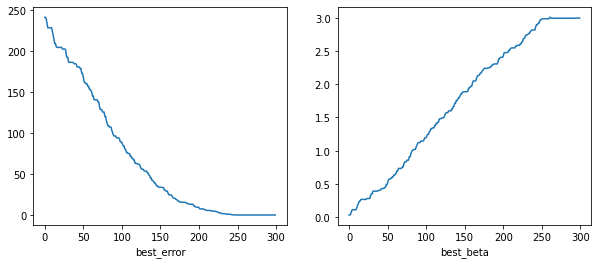

In [5]:
def lathatatlan_fuggveny(id, beta):
  return np.sin(id) * beta

id = np.linspace(0, 1, 100)

beta_amit_keresünk = 3
y1 = lathatatlan_fuggveny(id, beta_amit_keresünk)

decay = 0.1

best_beta_holder  = []
best_error_holder = []
best_beta  = 0
best_error = 99999999
for i in range(300):
  current_beta = best_beta + ((-0.5 + np.random.random()) * decay)
  pred  = lathatatlan_fuggveny(id, current_beta)
  error = np.sum((pred-y1)**2)
  error = float(error)
  if error < best_error:
    best_beta = current_beta
    best_error = error
  best_error_holder.append(best_error)
  best_beta_holder.append(best_beta)
  # print('best_error = {:.3}, best_beta = {:.2} '.format(best_error, best_beta))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(best_error_holder)
ax1.set_xlabel('best_error')
ax2.plot(best_beta_holder)
ax2.set_xlabel('best_beta')
plt.show()

## Lua Lisa

<class 'numpy.ndarray'>
(444, 788, 3)
min 5 and max 227
uint8
uint8


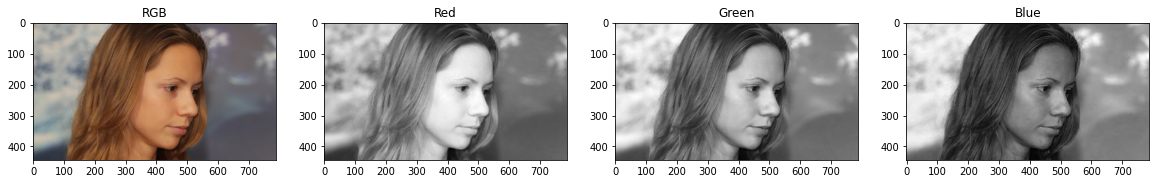

In [6]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman4.jpg')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

print('min {} and max {}'.format(red1.min(), red1.max()))
print(pic1.dtype)
print(red1.dtype)

plt.show()

min 0.054901960784313725 and max 2.2627450980392156


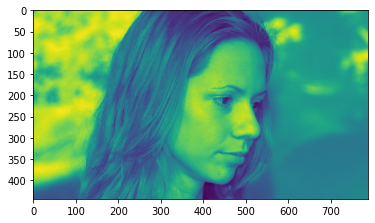

In [7]:
r = red1.astype('float64')
g = green1.astype('float64')
b = blue1.astype('float64')

gray = (r + g + b).astype('float64')

gray = gray/255.0
print('min {} and max {}'.format(gray.min(), gray.max()))
plt.imshow(gray)

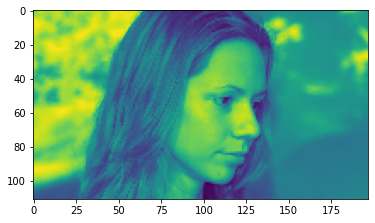

In [8]:
gray = skimage.transform.rescale(gray, 0.25, anti_aliasing=False)

plt.imshow(gray)


## Pilot Cont. 1

In [9]:
abc = 0.1

abc = 0 if abc < 0 else abc

abc

0.1

In [10]:
abc = [1,2,3,4,5,6]

bcb = random.sample(abc, len(abc))

print(abc)
print(bcb)

[1, 2, 3, 4, 5, 6]
[2, 1, 4, 6, 5, 3]


In [19]:
class Evolution:

  def __init__(self, original_image):
    self.original_image = original_image
    self.height = self.original_image.shape[0]
    self.width  = self.original_image.shape[1]
    print('self.height =', self.height)
    print('self.width  =', self.width)
    pass

  # ------- Segéd függvény a hibához ------
  def calc_distace(self, original_image, created_image):
    err = np.sum((original_image - created_image)**2)
    return err

  # ------- Segéd függvény az ábrához ----
  def show_solution(self, solution):
    p_img = np.zeros((self.height, self.width), dtype=np.float64)

    # Menjünk végig az összes körön
    for circle in solution:
      _r = circle.get('_r')
      _c = circle.get('_c')
      _rr = _cr = circle.get('_rr')
      _value = circle.get('_value')

      rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

      # ha kilóg a képből akkor le kell vágni
      rr[rr >= height] = height-1                   # <-- a row a magasság
      cc[cc >= width] = width-1                     # <-- a col a szélesség
      rr[rr < 0] = 0
      cc[cc < 0] = 0

      p_img[rr, cc] = _value                        # <-- adjuk hozzá a kört a képhez a megfelelő pixel intenzitással [value]

    plt.imshow(p_img, cmap='gray'); plt.show()                   # <-- show image


  # ------- Segéd függvény a hibához -----
  def show_history(self):
    plt.figure()
    plt.plot(self.error_history)
    plt.plot(self.best_error_history)
    plt.show()


  # ------- Create initial solution -------
  def init_solution(self, number_of_cirles, min_circle_radius, max_circle_radius):
    print('------------------- init_solution -----------------')
    self.number_of_cirles = number_of_cirles
    self.min_circle_radius = min_circle_radius
    self.max_circle_radius = max_circle_radius

    solution = []
    individum = {}
    for i in range(self.number_of_cirles):
      _r = np.random.randint(low = 0, high = height-2)    # <-- 788
      _c = np.random.randint(low = 0, high = width-2)     # <-- 444
      _rr = _cr = np.random.randint(low = self.min_circle_radius, high = self.max_circle_radius)
      _value = np.random.rand()                           # <-- 0-1
      individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
      solution.append(individum)

    self.initial_solution = solution


  # ------- Create initial solution -------
  def setup_evolution(self, rf_r, rf_c, rf_rr, rf_v):
    self._rf_r = rf_r
    self._rf_c = rf_c
    self._rf_rr = rf_rr
    self._rf_v = rf_v


  # ------- Start evolution --------------
  def run_evolution(self, generation = 10, population = 20, selection_rate = 1.0, print_every_solution_result = False, show_time = 50) -> str:

    start_time = time.time()

    best_solution = deepcopy(self.initial_solution)
    best_error = 999999999999.0
    best_img = None
    error_history = []
    best_error_history = []

    for g in range(generation):

      # olvassuk be a solutiont -> mutáljuk -> és csináljuk meg ez a alpján a becslést
      
      for p in range(population):

        p_img = np.zeros((self.height, self.width), dtype=np.float64)

        current_solution = []
        individum = {}

        # Menjünk végig az összes körön
        factor = np.random.rand()                                                         # <-- ad egy véletlen számot ennyivel módosítom a határokat
        for circle in best_solution:
          rnd_for_circle = np.random.rand()
          mutate_circle  = True if rnd_for_circle <= selection_rate else False
          if mutate_circle == True:
            _r = circle.get('_r') + np.random.randint(low = -self._rf_r, high = self._rf_r)
            _r = 0 if _r < 0 else _r
            _r = height if _r > height else _r
            _c = circle.get('_c') + np.random.randint(low = -self._rf_c, high = self._rf_c)
            _c = 0 if _c < 0 else _c
            _c = width if _c > width else _c
            _rr = circle.get('_rr') + np.random.randint(low = -self._rf_rr, high = self._rf_rr)
            _rr = self.min_circle_radius if _rr < self.min_circle_radius else _rr                   # <-- ne lehessen kisebb mint az előre megatott érték
            _rr = self.max_circle_radius if _rr > self.max_circle_radius else _rr                   # <-- ne léphesse túl az előre megadott értéket
            _cr = _rr
            _value = circle.get('_value') + ((-0.5 + np.random.rand()) * self._rf_v)
            _value = 0 if _value < 0 else _value                                            # <-- ne lehessen kisebb mint az előre megatott érték
            _value = 1 if _value > 1 else _value                                            # <-- ne léphesse túl az előre megadott értéket
          else:
            _r = circle.get('_r')
            _c = circle.get('_c')
            _rr = circle.get('_rr')
            _cr = _rr
            _value = circle.get('_value')




          # ugyan úgy hozzá kell adnom a egy solution-höz ha utána ki akarom mentei
          individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
          current_solution.append(individum)

          rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

          # ha kilóg a képből akkor le kell vágni
          rr[rr >= height] = height-1                   # <-- a row a magasság
          cc[cc >= width] = width-1                     # <-- a col a szélesség

          # adjuk hozzá a kört a képhez
          p_img[rr, cc] = _value

        # Ha meg van az összes kör a képen, akkor számoljuk ki az eredményt
        err = self.calc_distace(self.original_image, p_img)
        if( print_every_solution_result == True ):
          print('G {} S {}   = {}'.format(g, p, round(err)))

        # Ha ez a hiba jobb mint eddig bármi akkor adjuk hozzá, már generáción belül (igen ez hiba de most nem érdekel)
        if ( err < best_error ):
          best_error = err
          best_solution = deepcopy(current_solution)
          print('Found Better Solution in Generateion {} at Solution {}  ---> Err. = {}'.format(g, p, round(best_error, 5)))
          best_img = p_img                              # <-- ToDo: lehet, hogy Deepcopyzni kell
        
        # Tároljuk el a hibát későbbi elemzésre
        error_history.append(err)
        best_error_history.append(best_error)

      # Néha plotoljunk
      if( g % show_time == 0 ):
        clear_output(wait=True)
        self.show_solution(best_solution)
        print('generation =', g)

    self.error_history = error_history
    self.best_error_history = best_error_history

    end_time = time.time()
    run_time = end_time - start_time
    print('run_time = ', run_time)




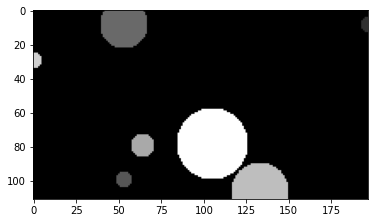

generation = 0
Found Better Solution in Generateion 1 at Solution 2  ---> Err. = 34875.59132
run_time =  0.20438194274902344


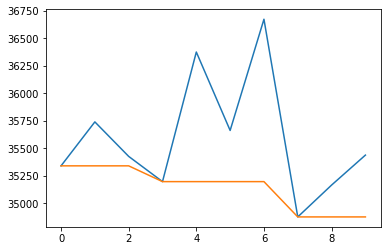

In [20]:
# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
number_of_cirles = 7
min_circle_radius = 5
max_circle_radius = 40

# ------- Evoltuion paramters -----------

rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 30                                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25                              # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False
show_time = 20


# ------- Run evolution ----------------

evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.run_evolution(generation = 2, population = 5, selection_rate = 1.0, show_time = 10)

evolution.show_history()

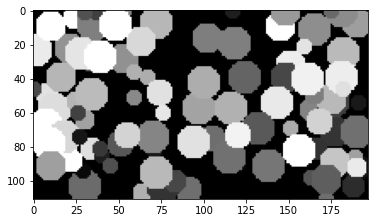

generation = 180
Found Better Solution in Generateion 187 at Solution 2  ---> Err. = 18894.54888
Found Better Solution in Generateion 189 at Solution 3  ---> Err. = 18859.83916
Found Better Solution in Generateion 191 at Solution 3  ---> Err. = 18819.90188
Found Better Solution in Generateion 194 at Solution 0  ---> Err. = 18731.80496
run_time =  18.368700742721558


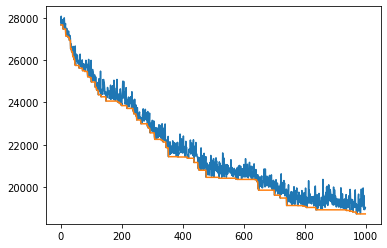

In [23]:
# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
number_of_cirles = 100
min_circle_radius = 5
max_circle_radius = 10

# ------- Evoltuion paramters -----------

rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 5                                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25                              # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False
show_time = 20


# ------- Run evolution ----------------

evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.run_evolution(generation = 200, population = 5, selection_rate = 0.1, show_time = 20)

evolution.show_history()

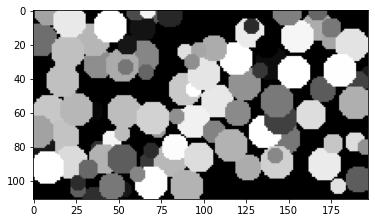

generation = 480
Found Better Solution in Generateion 486 at Solution 0  ---> Err. = 18339.83126
Found Better Solution in Generateion 492 at Solution 3  ---> Err. = 18248.79732
Found Better Solution in Generateion 497 at Solution 2  ---> Err. = 18234.93755
Found Better Solution in Generateion 499 at Solution 2  ---> Err. = 18217.16691
run_time =  43.28866934776306


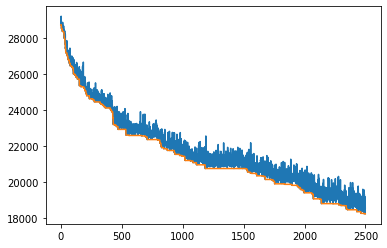

In [24]:
# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
number_of_cirles = 100
min_circle_radius = 5
max_circle_radius = 10

# ------- Evoltuion paramters -----------

rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 5                                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25                              # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False
show_time = 20


# ------- Run evolution ----------------

evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.run_evolution(generation = 500, population = 5, selection_rate = 0.1, show_time = 20)

evolution.show_history()

## ToDo

Párhuzamosítani a populációt szálakra - Pythonban megnézni, hogy müködik ez. Join.

Ha megvan akkor kivezetni a lehetséges szálák beállítását (->kontroll)

Ha megvan akkor csinálni az ELKH-ban egy 16VCPU 32GB gépet és lefuttatni.

Bevezetni a Crossover mechanizmust ( a két legjobb legyen kiválasztva )

Bevezetni, hogy csak a Populációs kör után csapja felül a Best_Solution-t


```
# JoDeMiro
```

